<a href="https://colab.research.google.com/github/mmargowski/clothing-image-classification/blob/master/Clothing_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This implementation trains a neural network to classify images of clothings.
First we import tensorflow & keras.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Import the image dataset.The dataset hat 10 labels(0-9). The images are 28x28 greyscale images with a value in the range of 0-255.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Add the corresponding strings to the labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

So there are 60k images in the training set.

In [5]:
test_images.shape

(10000, 28, 28)

And 10k images in the test set.

Preprocess the data by scaling the values of each pixel down so it falls in the range of 0-1.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Taking a look at the first 25 images before building the neural network.

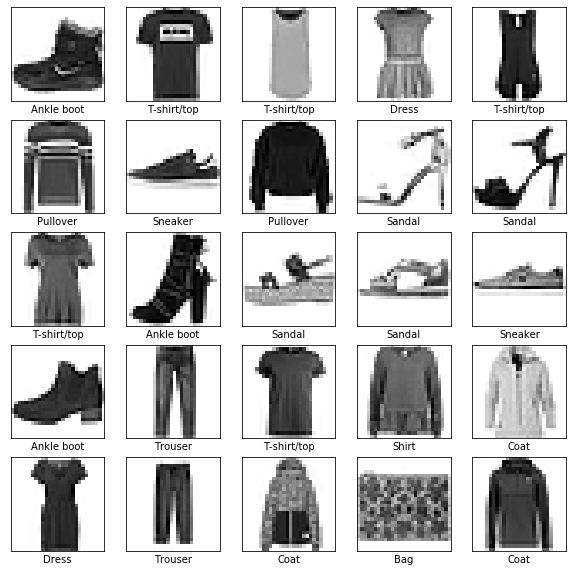

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now we build the model. We have a 28x28 input dimension and a 10 possible output values.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Compile the model.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit the model to the training data.

In [10]:
model.fit(train_images, train_labels, epochs=100)


Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4976 - acc: 0.8250
Epoch 2/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3790 - acc: 0.8634
Epoch 3/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3402 - acc: 0.8749
Epoch 4/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3157 - acc: 0.8848
Epoch 5/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2961 - acc: 0.8915
Epoch 6/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2812 - acc: 0.8961
Epoch 7/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2710 - acc: 0.8995
Epoch 8/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2590 - acc: 0.9051
Epoch 9/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2503 - acc: 0.9069
Epoch 10/100
60000/60000 [========================

Evaluate the model.

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.7881 - acc: 0.8861

Test accuracy: 0.8861


Predict the test images.

In [0]:
predictions = model.predict(test_images)


Two functions to plot the predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Take a look at some predictions of the neural network.

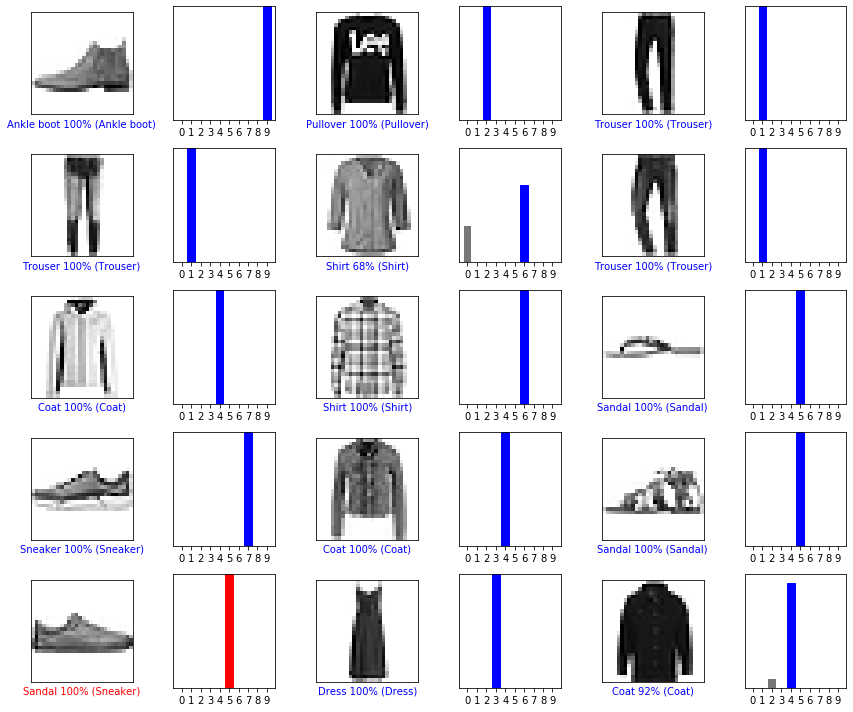

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()